In [1]:
import pandas as pd

In [2]:
url = 'https://fbref.com/en/matches/e81453d3/Liverpool-Real-Madrid-May-28-2022-Champions-League'

df = pd.read_html(url, attrs={'id':'shots_all'})[0]

In [9]:
df.head()

,Minute,Player,Squad,xG,Outcome
0,16,Mohamed Salah,Liverpool,0.29,Saved
1,16,Luis Díaz,Liverpool,0.07,Blocked
2,16,Thiago Alcántara,Liverpool,0.04,Saved
3,17,Mohamed Salah,Liverpool,0.09,Saved
4,19,Trent Alexander-Arnold,Liverpool,0.05,Off Target


In [4]:
df = df.drop(columns=[x for x in df.columns if 'SCA' in x[0]])

In [6]:
df.columns = df.columns.droplevel(0)

In [8]:
df = df[['Minute', 'Player', 'Squad', 'xG', 'Outcome']]

In [10]:
df['cumulative_xG'] = df.groupby('Squad')['xG'].cumsum()

In [11]:
df

,Minute,Player,Squad,xG,Outcome,cumulative_xG
0,16,Mohamed Salah,Liverpool,0.29,Saved,0.29
1,16,Luis Díaz,Liverpool,0.07,Blocked,0.36
2,16,Thiago Alcántara,Liverpool,0.04,Saved,0.40
3,17,Mohamed Salah,Liverpool,0.09,Saved,0.49
4,19,Trent Alexander-Arnold,Liverpool,0.05,Off Target,0.54
5,21,Sadio Mané,Liverpool,0.06,Saved,0.60
6,28,Fabinho,Liverpool,0.03,Off Target,0.63
7,34,Mohamed Salah,Liverpool,0.04,Saved,0.67
8,40,Sadio Mané,Liverpool,0.13,Blocked,0.80
9,41,Jordan Henderson,Liverpool,0.01,Off Target,0.81


In [12]:
df = df.dropna(subset=["Minute"])

In [13]:
df.head(20)

,Minute,Player,Squad,xG,Outcome,cumulative_xG
0,16,Mohamed Salah,Liverpool,0.29,Saved,0.29
1,16,Luis Díaz,Liverpool,0.07,Blocked,0.36
2,16,Thiago Alcántara,Liverpool,0.04,Saved,0.40
3,17,Mohamed Salah,Liverpool,0.09,Saved,0.49
4,19,Trent Alexander-Arnold,Liverpool,0.05,Off Target,0.54
5,21,Sadio Mané,Liverpool,0.06,Saved,0.60
6,28,Fabinho,Liverpool,0.03,Off Target,0.63
7,34,Mohamed Salah,Liverpool,0.04,Saved,0.67
8,40,Sadio Mané,Liverpool,0.13,Blocked,0.80
9,41,Jordan Henderson,Liverpool,0.01,Off Target,0.81


In [15]:
df['half'] = df['Minute'].apply(lambda x: 1 if int(x.split('+')[0]) <= 45 else 2)

C:\Users\knich\AppData\Local\Temp\ipykernel_33660\1118031096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['half'] = df['Minute'].apply(lambda x: 1 if int(x.split('+')[0]) <= 45 else 2)


In [17]:
df.tail()

,Minute,Player,Squad,xG,Outcome,cumulative_xG,half
24,80,Mohamed Salah,Liverpool,0.05,Blocked,1.58,2
25,80,Diogo Jota,Liverpool,0.29,Saved,1.87,2
26,81,Naby Keïta,Liverpool,0.16,Off Target,2.03,2
27,82,Mohamed Salah,Liverpool,0.16,Saved,2.19,2
28,90+2,Eduardo Camavinga,Real Madrid,0.06,Off Target,0.92,2


In [18]:
df['Minute'] = df['Minute'].apply(lambda x: sum([int(y) for y in x.split('+')]))

C:\Users\knich\AppData\Local\Temp\ipykernel_33660\371728397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minute'] = df['Minute'].apply(lambda x: sum([int(y) for y in x.split('+')]))


In [19]:
df.tail()

,Minute,Player,Squad,xG,Outcome,cumulative_xG,half
24,80,Mohamed Salah,Liverpool,0.05,Blocked,1.58,2
25,80,Diogo Jota,Liverpool,0.29,Saved,1.87,2
26,81,Naby Keïta,Liverpool,0.16,Off Target,2.03,2
27,82,Mohamed Salah,Liverpool,0.16,Saved,2.19,2
28,92,Eduardo Camavinga,Real Madrid,0.06,Off Target,0.92,2


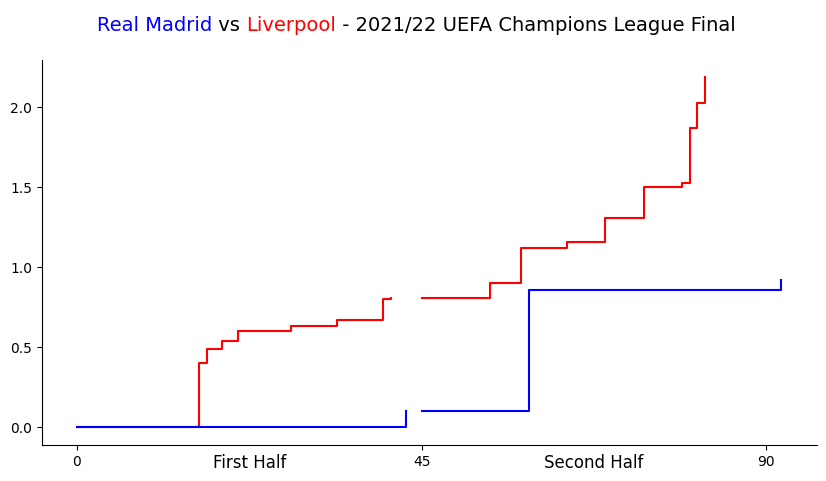

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 5))

liverpool_color = 'red'
real_madrid_color = 'blue'

for team in df['Squad'].unique():
    team_df = df[df['Squad'] == team]

    team_df = pd.concat([pd.DataFrame({'Squad': team, 'Minute': 0, 'xG': 0, 'Outcome': '', 'cumulative_xG': 0, 'half': 1}, index=[0]), team_df])

    team_df = pd.concat([team_df[team_df['half'] == 1],
                pd.DataFrame({'Squad': team, 'Minute':45 , 'xG': 0, 'Outcome': '', 'cumulative_xG': team_df[team_df['half'] == 1]['cumulative_xG'].iloc[-1], 'half': 2}, index=[0]),
                team_df[team_df['half'] == 2]])

    for half in team_df['half'].unique():
        half_df = team_df[team_df['half'] == half]
        ax.plot(
            half_df['Minute'],
            half_df['cumulative_xG'],
            label=team,
            drawstyle='steps-post',
            c = liverpool_color if team=='Liverpool' else real_madrid_color
        )

ax.set_xticks([0, 45, 90])
ax.text(22.5, -.25, 'First Half', ha='center', fontsize=12)
ax.text(67.5, -.25, 'Second Half', ha='center', fontsize=12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

from highlight_text import fig_text

fig_text(
    .5,
    .95,
    '<Real Madrid> vs <Liverpool> - 2021/22 UEFA Champions League Final',
    fontsize=14,
    ha='center',
    va='center',
    ax=ax,
    highlight_textprops=[{'color': real_madrid_color}, {'color': liverpool_color}]
)
